# SPAMBASE DATASET

**File:** Spambase.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# IMPORT LIBRARIES

In [1]:
import pandas as pd                                   # For dataframes
import matplotlib.pyplot as plt                       # For plotting data
import seaborn as sns                                 # For plotting data
from sklearn.model_selection import train_test_split  # For train/test splits

# LOAD AND PREPARE DATA
Many of the datasets for this course come from the Machine Learning Repository at the University of California, Irvine (UCI) at [https://archive.ics.uci.edu/](https://archive.ics.uci.edu/).

For all the three demonstrations of clustering techniques, we'll use the `Spambase Data Set`, which can be accessed via [https://archive.ics.uci.edu/ml/datasets/Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase). We'll use the dataset saved in the file `spambase.data`. 

This data can be downloaded as a `CSV` file without the variable names using `pd.read_csv`. You'll need to manually add the `.csv` extension. This code saves the file in the data folder of our Python directory.

## Import Data

- To read read the dataset from a local CSV file, run the following cell. (This is the recommended approach.)

In [2]:
df = pd.read_csv('data/spambase_raw.csv', header=None)

- Alternatively, to read the data from the UCI ML Repository, uncomment the lines in the cell below and run them.

In [3]:
# df = pd.read_csv(
#     'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',
#     header=None)

- Look at the data.

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Rename Variables

- Assign a name to all attributes as `X0`, `X1`, ..., `X56`.
- Assign `y` to the class variable (the last column of df).
- Display the first 5 rows.

In [5]:
# Sequentially renames all attribute columns and renames the last column to 'y'
df.columns = ['X' + str(i) for i in range(0, len(df.columns) - 1)] + ['y']

# Shows the first few lines of the data
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Split Data
To prepare the dataset for classification, we have to split it into train and test sets.

- `train_test_split()` splits the data into train and test.
- In the arguments list, the data matrix consists of all attribute columns. Extract columns `X0`, `X1`, ..., `X56` with `df.filter(regex='\d')`. The filter keeps only the names that have a numeric character in them.
- Specify the target variable as `df.y`.
- Set up `trn` and `tst` dataframes.

In [6]:
# Specifies X by filtering all columns with a number in name
X_trn, X_tst, y_trn, y_tst = train_test_split(
    df.filter(regex='\d'),  
    df.y, 
    test_size=0.30,
    random_state=1)

# Creates the training dataset, trn
trn = X_trn
trn['y'] = y_trn

# Creates the testing dataset, tst
tst = X_tst
tst['y'] = y_tst

# EXPLORE TRAINING DATA

## Bar Plot of Class Variable

Use Seaborn's `countplot()` function to create a bar plot.

<AxesSubplot: xlabel='y', ylabel='count'>

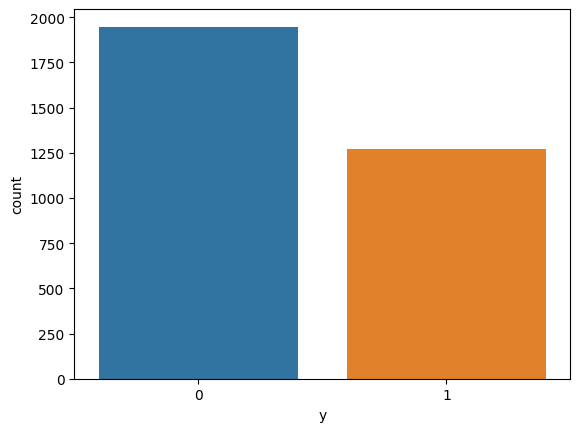

In [7]:
sns.countplot(x='y', data=trn)

## Explore Attribute Variables
Select four arbitrary features and get paired plots (takes a moment).

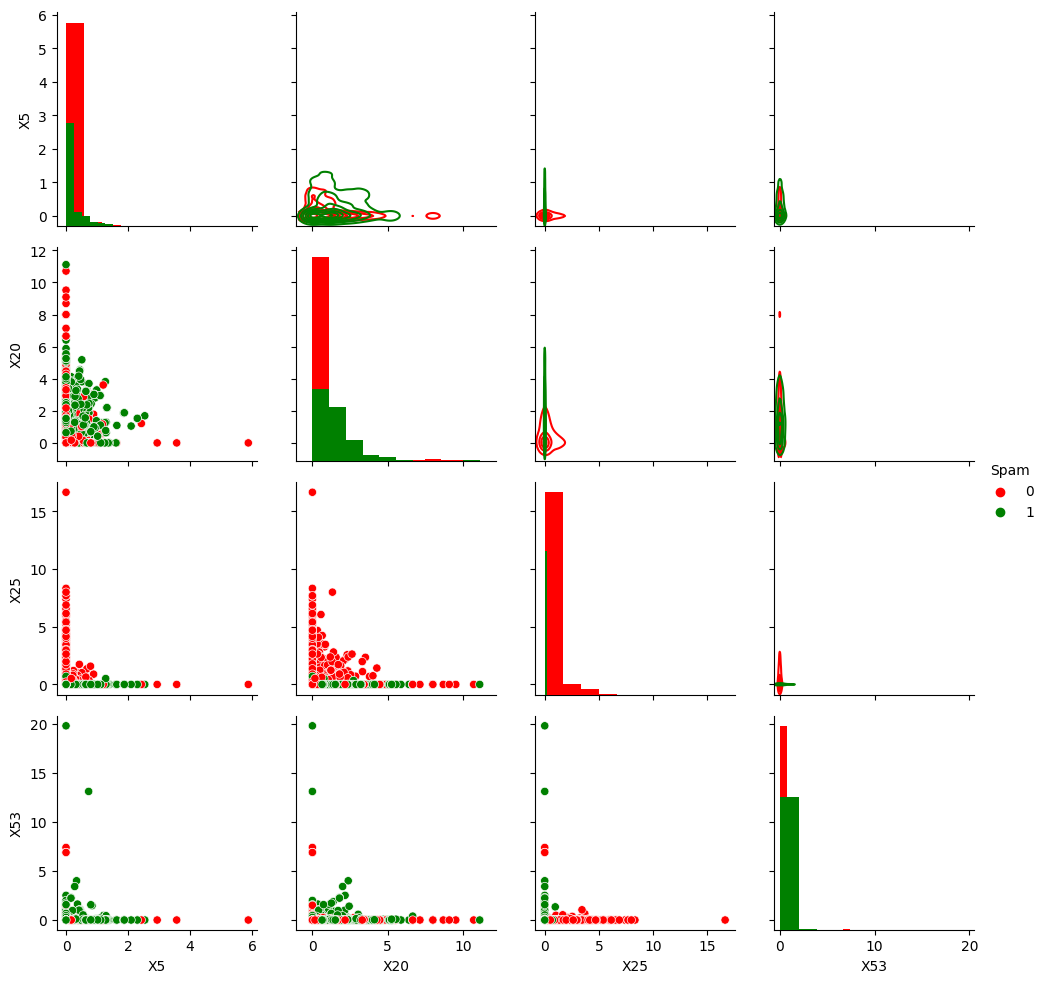

In [8]:
# Creates a grid using Seaborn's PairGrid()
g = sns.PairGrid(
    trn, 
    vars=['X5', 'X20', 'X25', 'X53'], 
    hue='y', 
    diag_sharey=False, 
    palette=['red', 'green'])

# Adds histograms on the diagonal
g.map_diag(plt.hist)

# Adds density plots above the diagonal
g.map_upper(sns.kdeplot)

# Adds scatterplots below the diagonal
g.map_lower(sns.scatterplot)

# Adds a legend
g.add_legend(title='Spam')


# SAVE DATA
Save `df`, `trn`, and `tst` to CSV files to be used later

In [9]:
df.to_csv('data/spambase.csv', sep=',', index=False)
trn.to_csv('data/spambase_trn.csv', sep=',', index=False)
tst.to_csv('data/spambase_tst.csv', sep=',', index=False)

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.